In [194]:
#################################################################################
#id     -> depremin id si                                                       #
#date   -> Depremin Tarihi                                                      #
#time   -> Zaman                                                                #
#lat    -> Enlem                                                                #
#long   -> Boylam                                                               #
#country-> Şehir                                                                #
#dist   -> Deprem mesafesi                                                      #
#depth  -> Deprem derinliği                                                     #
#md     -> Deprem süresi                                                        #
#richter-> Yerel büyüklük yada richter büyüklüğü                                #
#mw     -> moment büyüklüğü                                                     #
#ms     -> yüzey dalgası büyüklüğü                                              #
#mb     -> düzlemdalgası büyüklüğü                                              #
#xm     -> MD,ML,Mw,Ms ve MB dışındaki en büyük büyüklük                        #
#################################################################################

import numpy as np #Linear Algebra Library
import pandas as pd # Doing a data processing, Import/Output to CSV File (exp-> pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import time
import datetime
from datetime import datetime
import collections


import os
#We determined the location of the files with Listdr
print(os.listdir("C://Users//burak"))



['.android', '.AndroidStudio4.0', '.atom', '.conda', '.condarc', '.config', '.dotnet', '.expo', '.gradle', '.IntelliJIdea2019.2', '.ipynb_checkpoints', '.ipython', '.jupyter', '.librarymanager', '.matplotlib', '.nbi', '.nuget', '.Origin', '.QtWebEngineProcess', '.react-native-cli', '.spyder-py3', '.templateengine', '.VirtualBox', '.vscode', '3D Objects', 'anaconda3', 'AndroidStudioProjects', 'ansel', 'AppData', 'Apple', 'Application Data', 'Belgelerim', 'Contacts', 'Cookies', 'Creative Cloud Files', 'Desktop', 'Documents', 'Downloads', 'earthquake.csv', 'Exploration.ipynb', 'Favorites', 'Group-9.ipynb', 'java_error_in_idea_18108.log', 'Links', 'Local Settings', 'MicrosoftEdgeBackups', 'Music', 'NetHood', 'NTUSER.DAT', 'ntuser.dat.LOG1', 'ntuser.dat.LOG2', 'NTUSER.DAT{fd9a35db-49fe-11e9-aa2c-248a07783950}.TM.blf', 'NTUSER.DAT{fd9a35db-49fe-11e9-aa2c-248a07783950}.TMContainer00000000000000000001.regtrans-ms', 'NTUSER.DAT{fd9a35db-49fe-11e9-aa2c-248a07783950}.TMContainer000000000000000000

In [125]:
#Name of the csv file to be read and the reading process
data = pd.read_csv('earthquake.csv')

In [138]:
#Dosya içerisindeki sütunların adı
data.columns

Index(['id', 'date', 'time', 'lat', 'long', 'country', 'city', 'area',
       'direction', 'dist', 'depth', 'xm', 'md', 'richter', 'mw', 'ms', 'mb'],
      dtype='object')

In [139]:
data.info

<bound method DataFrame.info of                  id        date         time    lat   long country      city  \
0      2.000000e+13  2003.05.20  12:17:44 AM  39.04  40.38  turkey    bingol   
1      2.010000e+13  2007.08.01  12:03:08 AM  40.79  30.09  turkey   kocaeli   
2      1.980000e+13  1978.05.07  12:41:37 AM  38.58  27.61  turkey    manisa   
3      2.000000e+13  1997.03.22  12:31:45 AM  39.47  36.44  turkey     sivas   
4      2.000000e+13  2000.04.02  12:57:38 AM  40.80  30.24  turkey   sakarya   
...             ...         ...          ...    ...    ...     ...       ...   
24002  2.020000e+13  2017.03.10  12:23:42 AM  37.50  38.48  turkey  adiyaman   
24003  2.020000e+13  2017.03.10  12:42:44 AM  40.47  35.84  turkey    amasya   
24004  2.020000e+13  2017.04.05  12:08:11 AM  38.63  27.57  turkey    manisa   
24005  2.020000e+13  2017.04.05  12:35:09 AM  38.65  27.55  turkey    manisa   
24006  2.020000e+13  2017.04.05  12:25:25 AM  38.63  27.58  turkey    manisa   

       

In [140]:
data.describe()

,id,lat,long,dist,depth,xm,md,richter,mw,ms,mb
count,2.400700e+04,24007.000000,24007.000000,10062.000000,24007.000000,24007.000000,24007.000000,24007.000000,5003.000000,24007.000000,24007.000000
mean,1.991982e+13,37.929474,30.773229,3.175015,18.491773,4.056038,1.912346,2.196826,4.478973,0.677677,1.690561
std,2.060396e+11,2.205605,6.584596,4.715461,23.218553,0.574085,2.059780,2.081417,1.048085,1.675708,2.146108
min,1.910000e+13,29.740000,18.340000,0.100000,0.000000,3.500000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.980000e+13,36.190000,26.195000,1.400000,5.000000,3.600000,0.000000,0.000000,4.100000,0.000000,0.000000
50%,2.000000e+13,38.200000,28.350000,2.300000,10.000000,3.900000,0.000000,3.500000,4.700000,0.000000,0.000000
75%,2.010000e+13,39.360000,33.855000,3.600000,22.400000,4.400000,3.800000,4.000000,5.000000,0.000000,4.100000
max,2.020000e+13,46.350000,48.000000,95.400000,225.000000,7.900000,7.400000,7.200000,7.700000,7.900000,7.100000


In [141]:
data.corr

<bound method DataFrame.corr of                  id        date         time    lat   long country      city  \
0      2.000000e+13  2003.05.20  12:17:44 AM  39.04  40.38  turkey    bingol   
1      2.010000e+13  2007.08.01  12:03:08 AM  40.79  30.09  turkey   kocaeli   
2      1.980000e+13  1978.05.07  12:41:37 AM  38.58  27.61  turkey    manisa   
3      2.000000e+13  1997.03.22  12:31:45 AM  39.47  36.44  turkey     sivas   
4      2.000000e+13  2000.04.02  12:57:38 AM  40.80  30.24  turkey   sakarya   
...             ...         ...          ...    ...    ...     ...       ...   
24002  2.020000e+13  2017.03.10  12:23:42 AM  37.50  38.48  turkey  adiyaman   
24003  2.020000e+13  2017.03.10  12:42:44 AM  40.47  35.84  turkey    amasya   
24004  2.020000e+13  2017.04.05  12:08:11 AM  38.63  27.57  turkey    manisa   
24005  2.020000e+13  2017.04.05  12:35:09 AM  38.65  27.55  turkey    manisa   
24006  2.020000e+13  2017.04.05  12:25:25 AM  38.63  27.58  turkey    manisa   

       

In [142]:
data.head(10)

,id,date,time,lat,long,country,city,area,direction,dist,depth,xm,md,richter,mw,ms,mb
0,2.000000e+13,2003.05.20,12:17:44 AM,39.04,40.38,turkey,bingol,baliklicay,west,0.1,10.0,4.1,4.1,0.0,NaN,0.0,0.0
1,2.010000e+13,2007.08.01,12:03:08 AM,40.79,30.09,turkey,kocaeli,bayraktar_izmit,west,0.1,5.2,4.0,3.8,4.0,NaN,0.0,0.0
2,1.980000e+13,1978.05.07,12:41:37 AM,38.58,27.61,turkey,manisa,hamzabeyli,south_west,0.1,0.0,3.7,0.0,0.0,NaN,0.0,3.7
3,2.000000e+13,1997.03.22,12:31:45 AM,39.47,36.44,turkey,sivas,kahvepinar_sarkisla,south_west,0.1,10.0,3.5,3.5,0.0,NaN,0.0,0.0
4,2.000000e+13,2000.04.02,12:57:38 AM,40.80,30.24,turkey,sakarya,meseli_serdivan,south_west,0.1,7.0,4.3,4.3,0.0,NaN,0.0,0.0
5,2.010000e+13,2005.01.21,12:04:03 AM,37.11,27.75,turkey,mugla,demirciler_milas,south_west,0.1,32.8,3.5,3.5,0.0,NaN,0.0,0.0
6,2.010000e+13,2012.06.24,12:07:22 AM,38.75,43.61,turkey,van,ilikaynak,south_west,0.1,9.4,4.5,0.0,4.5,NaN,0.0,0.0
7,1.990000e+13,1987.12.31,12:49:54 AM,39.43,27.98,turkey,balikesir,dikkonak_bigadic,south_east,0.1,26.0,3.8,3.8,0.0,NaN,0.0,0.0
8,2.000000e+13,2000.02.07,12:11:45 AM,40.05,34.07,turkey,kirikkale,kocabas_delice,south_east,0.1,1.0,3.8,3.8,0.0,NaN,0.0,0.0
9,2.010000e+13,2011.10.28,12:47:56 AM,38.76,43.54,turkey,van,degirmenozu,south_east,0.1,3.1,4.3,0.0,4.2,NaN,0.0,4.3


In [143]:
data.tail(10)

,id,date,time,lat,long,country,city,area,direction,dist,depth,xm,md,richter,mw,ms,mb
23997,2.020000e+13,2016.12.01,12:11:16 AM,40.78,32.78,turkey,cankiri,dikenli_cerkes,NaN,NaN,2.4,3.5,0.0,3.4,3.5,0.0,0.0
23998,2.020000e+13,2017.01.06,12:37:28 AM,39.24,28.05,turkey,balikesir,alakir_sindirgi,NaN,NaN,5.0,3.5,0.0,3.4,3.5,0.0,0.0
23999,2.020000e+13,2017.01.18,12:48:39 AM,39.55,26.12,turkey,canakkale,gulpinar_ayvacik,NaN,NaN,5.3,3.5,0.0,3.3,3.5,0.0,0.0
24000,2.020000e+13,2017.03.03,12:30:39 AM,37.61,38.45,turkey,adiyaman,doganca_samsat,NaN,NaN,10.1,3.8,0.0,3.6,3.8,0.0,0.0
24001,2.020000e+13,2017.03.03,12:51:54 AM,37.59,38.44,turkey,adiyaman,goltarla_samsat,NaN,NaN,10.9,3.8,0.0,3.8,3.8,0.0,0.0
24002,2.020000e+13,2017.03.10,12:23:42 AM,37.50,38.48,turkey,adiyaman,kirmacik_samsat,NaN,NaN,13.0,4.2,0.0,4.2,4.0,0.0,0.0
24003,2.020000e+13,2017.03.10,12:42:44 AM,40.47,35.84,turkey,amasya,kizoglu,NaN,NaN,5.6,3.6,0.0,3.5,3.6,0.0,0.0
24004,2.020000e+13,2017.04.05,12:08:11 AM,38.63,27.57,turkey,manisa,cavusoglu,NaN,NaN,10.6,4.1,0.0,4.0,4.1,0.0,0.0
24005,2.020000e+13,2017.04.05,12:35:09 AM,38.65,27.55,turkey,manisa,cavusoglu,NaN,NaN,8.7,3.8,0.0,3.6,3.8,0.0,0.0
24006,2.020000e+13,2017.04.05,12:25:25 AM,38.63,27.58,turkey,manisa,cavusoglu,NaN,NaN,9.0,3.5,0.0,3.4,3.5,0.0,0.0


In [144]:
data["city"].unique()

array(['bingol', 'kocaeli', 'manisa', 'sivas', 'sakarya', 'mugla', 'van',
       'balikesir', 'kirikkale', 'kahramanmaras', 'adiyaman', 'duzce',
       'antalya', 'kutahya', 'burdur', 'erzincan', 'hatay', 'mus',
       'denizli', 'canakkale', 'bolu', 'tokat', 'sanliurfa', 'corum',
       'izmir', 'gumushane', 'amasya', 'batman', 'cankiri', 'osmaniye',
       'elazig', 'bursa', 'erzurum', 'aydin', 'zonguldak', 'karabuk',
       'samsun', 'malatya', 'tekirdag', 'igdir', 'hakkari', 'ankara',
       'sirnak', 'diyarbakir', 'kirsehir', 'afyonkarahisar', 'kastamonu',
       'bartin', 'konya', 'isparta', 'kars', 'agri', 'bitlis', 'tunceli',
       'istanbul', 'yalova', 'yozgat', 'adana', 'usak', 'edirne',
       'kirklareli', 'mersin', 'bilecik', 'eskisehir', 'gaziantep',
       'bayburt', 'nigde', 'kayseri', 'giresun', 'mardin', 'artvin',
       'aksaray', 'ardahan', 'sinop', 'siirt', 'ordu', 'trabzon', 'kilis',
       'karaman', 'nevsehir', 'rize', nan, 'marmara_denizi', 'lefkosa',
       '

In [145]:
data["city"].value_counts()

mugla         1095
van            900
izmir          700
kutahya        687
canakkale      525
              ... 
guzelyurt        2
rize             2
kilicaslan       1
kayalar          1
fethiye          1
Name: city, Length: 93, dtype: int64

In [146]:
print(data.iloc[:10,1])

0    2003.05.20
1    2007.08.01
2    1978.05.07
3    1997.03.22
4    2000.04.02
5    2005.01.21
6    2012.06.24
7    1987.12.31
8    2000.02.07
9    2011.10.28
Name: date, dtype: object


In [147]:
a = data.loc[:, "date"]
b = data.loc[:, "time"]
print (a[0], b[0])
type(a)                                        

temp = a+"_"+b                               # this is the combined form we would like to achieve
timeformat="%Y.%m.%d_%H:%M:%S %p"

new=[datetime.strptime(x, timeformat) for x in temp]

#for i in temp:
#    i=datetime.strptime(i,timeformat)
#why not this way??

print("temp =",type(temp),"\n""new =",type(new),"\n""data.time =",type(data.date))

data.time=new

data.rename(columns={'time': 'newtime'}, inplace=True) 
del data["date"]                            # we dont need it anymore as all stored in date.time

2003.05.20 12:17:44 AM
temp = <class 'pandas.core.series.Series'> 
new = <class 'list'> 
data.time = <class 'pandas.core.series.Series'>


In [148]:
data["year"]=[int(datetime.strftime(x,"%Y")) for x in data.newtime]
data["month"]=[int(datetime.strftime(x,"%m"))+int(datetime.strftime(x,"%Y"))*12 for x in data.newtime]

In [149]:
tur=data.country == "turkey"
real=data.richter > 1

cit=data[tur & real].city
cits=cit.unique()

print("Total Cities =",cit.size)

a=0
for i in cits:
    a=a+1
    if a==len(cits):
        print("Unique Cities = {}".format(a))

f=Counter(cit)
newf=f.most_common()

print(type(f))
print(type(newf))

Total Cities = 5080
Unique Cities = 85
<class 'collections.Counter'>
<class 'list'>


In [150]:

maks=max(f, key=f.get) 
most=f.most_common(5)[0]
most2=f.most_common(5)[1]
print("Max number of eq occured in {} with {} eq and second is {} with {}" .format(maks.upper(),most[1],most2[0].upper(),most2[1]))



Max number of eq occured in VAN with 742 eq and second is MUGLA with 514


In [151]:
yearfilter = data.year > 1997
data[yearfilter][["year","country","city","area","depth"]].groupby(["year"], as_index = False).count().sort_values(by = "year", ascending = False)

,year,country,city,area,depth
19,2017,571,329,413,571
18,2016,569,202,315,569
17,2015,534,207,364,534
16,2014,564,212,317,564
15,2013,613,184,236,613
14,2012,668,401,424,668
13,2011,940,698,702,940
12,2010,438,201,210,438
11,2009,601,255,268,601
10,2008,581,258,267,581


In [152]:
yearfilter = data.year > 1990
data[yearfilter][["year","richter","xm","md","mw","ms","mb"]].groupby(["year"], as_index = False).count().sort_values(by = "richter", ascending = False)

,year,richter,xm,md,mw,ms,mb
20,2011,940,940,940,18,940,940
14,2005,802,802,802,20,802,802
21,2012,668,668,668,9,668,668
22,2013,613,613,613,206,613,613
18,2009,601,601,601,9,601,601
16,2007,593,593,593,12,593,593
5,1996,587,587,587,0,587,587
17,2008,581,581,581,13,581,581
26,2017,571,571,571,571,571,571
8,1999,571,571,571,0,571,571


In [153]:
yearfilter = data.year > 1990
data[yearfilter][["year","richter","long"]].groupby(["year"], as_index = False).mean().sort_values(by = "richter", ascending = False)

,year,richter,long
21,2012,3.891467,32.971766
24,2015,3.887266,30.320581
22,2013,3.884992,30.071093
23,2014,3.884220,29.008174
26,2017,3.827671,28.838529
25,2016,3.797364,29.218770
20,2011,3.322660,37.324468
19,2010,2.674201,32.050822
16,2007,2.051096,33.258853
17,2008,2.045955,32.580000


In [154]:
data.columns[data.isnull().any()]  

Index(['city', 'area', 'direction', 'dist', 'mw'], dtype='object')

In [155]:
data.isnull().sum()

id               0
newtime          0
lat              0
long             0
country          0
city         12253
area         11030
direction    13945
dist         13945
depth            0
xm               0
md               0
richter          0
mw           19004
ms               0
mb               0
year             0
month            0
dtype: int64

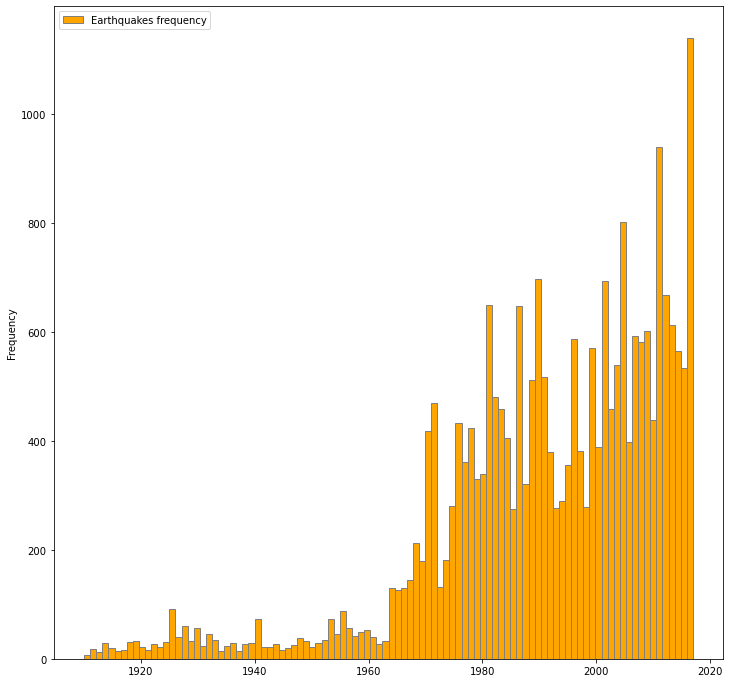

In [156]:
data.year.plot(kind = "hist" , color = "orange" , edgecolor="gray", bins = 100 , figsize = (12,12) , label = "Earthquakes frequency")
plt.legend(loc = "upper left")
plt.show()

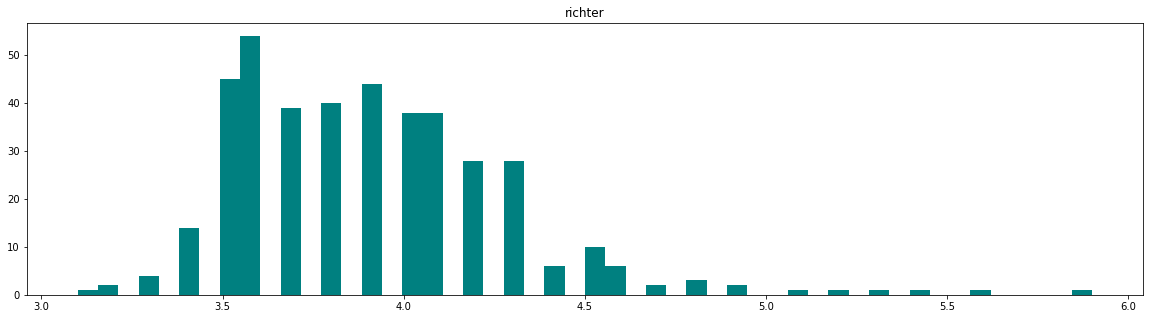

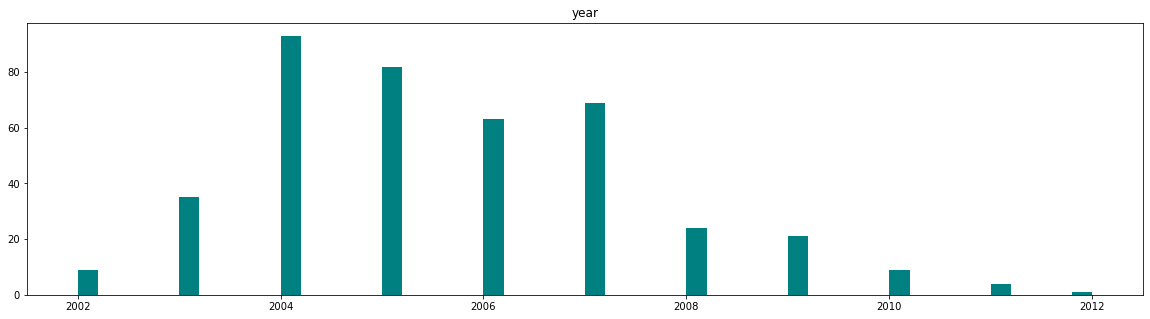

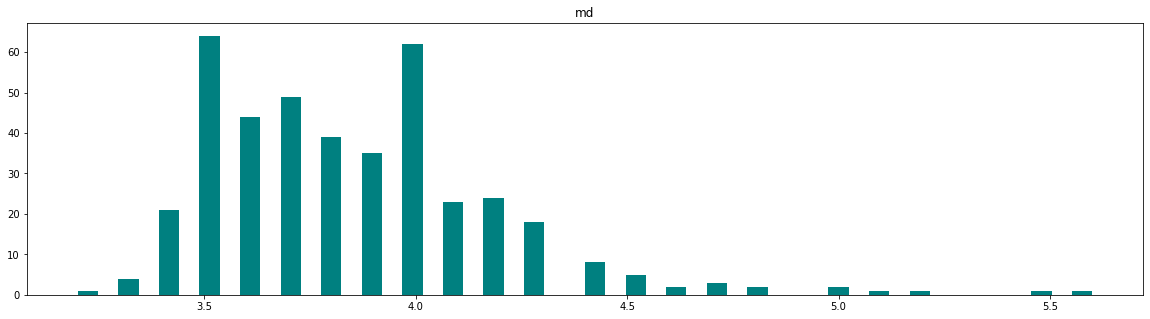

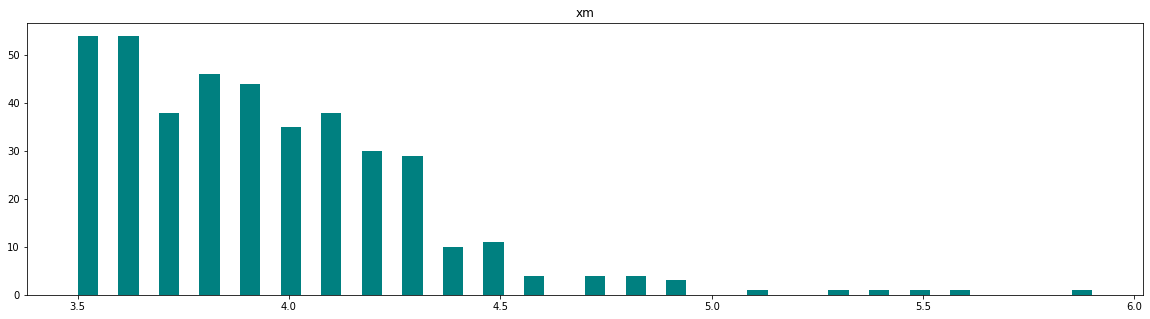

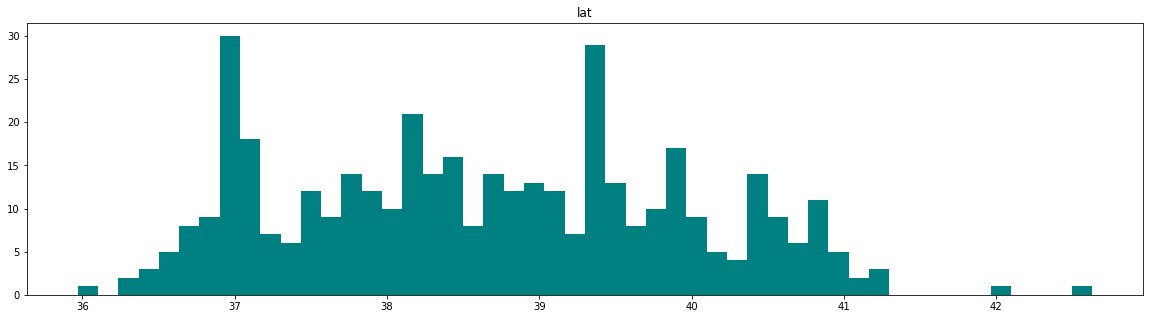

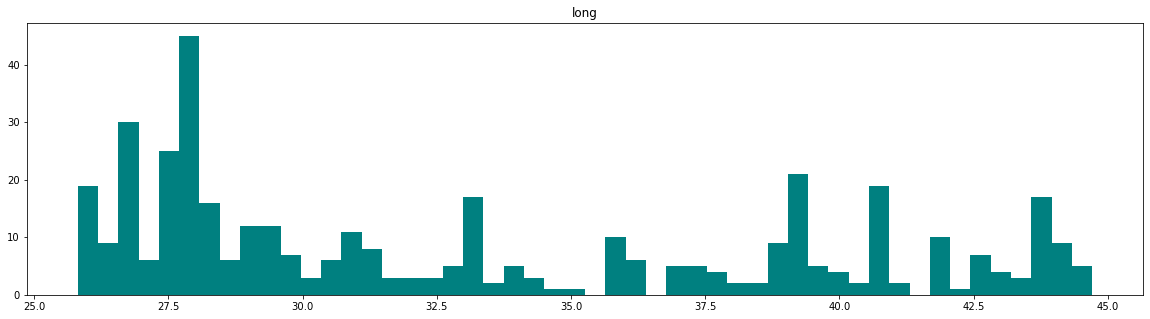

In [205]:
def dist(baslik):
    
    
    tur = data.country=="turkey"                # There arent many records before 2000 roughly, so lets filter after 1990, also just take magnitudes over 2 
    richter = data.richter > 3
    yearfilter = data.year > 1990
    md = data.md > 3
    
    datatr= data[tur & richter & yearfilter & md]
    
    plt.figure(figsize=(20,5))
    plt.hist(datatr[baslik], bins=50, color="Teal")    
    #plt.ylabel("Frequency")  #-> Sol tarafda olması gerekiyor ancak yazdığım da str objesi çağırılamaz hatası alıyorum.
    plt.title(baslik)

ozet=["richter", "year", "md", "xm","lat","long"]
    
for each in ozet:
    dist(each)

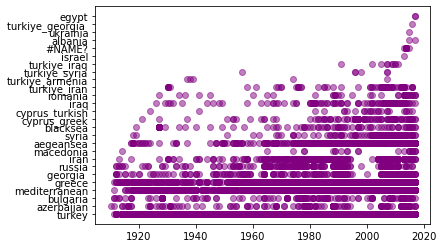

In [160]:
plt.scatter(data.year, data.country, color="purple", alpha =0.5)

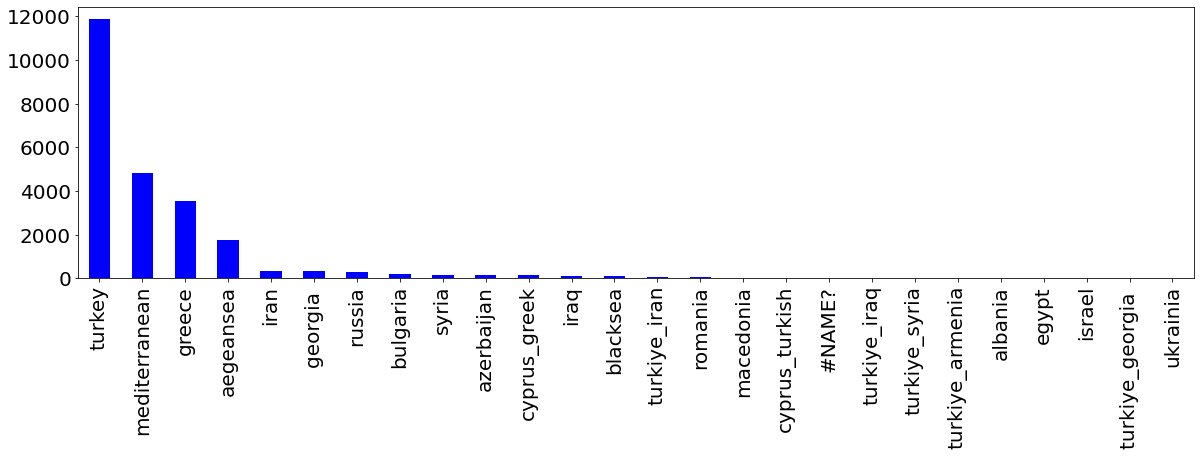

In [208]:
data.country.value_counts().plot(kind = "bar" , color = "blue" , figsize = (20,5),fontsize = 20)
#plt.xlabel("Country",fontsize=18,color="blue")
#plt.ylabel("Frequency",fontsize=18,color="blue")
plt.show()

Text(0.5, 1.0, 'Country')

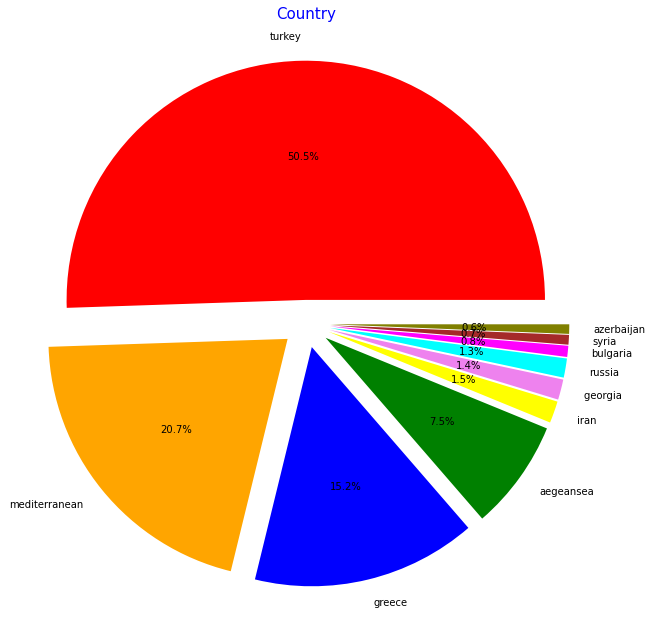

In [79]:
a=data.country.value_counts()[0:10]
sizes=a.values
labels=a.index
explode=[0,0,0,0,0,0]
colors=["red","orange","blue","green","yellow","violet","cyan","magenta","brown","olive","lime","gray"]
plt.figure(figsize=(11,11))
plt.pie(sizes,explode=[0.1]*10,labels=labels,colors=colors,autopct='%1.1f%%')
plt.title('Country',color = 'blue',fontsize = 15)

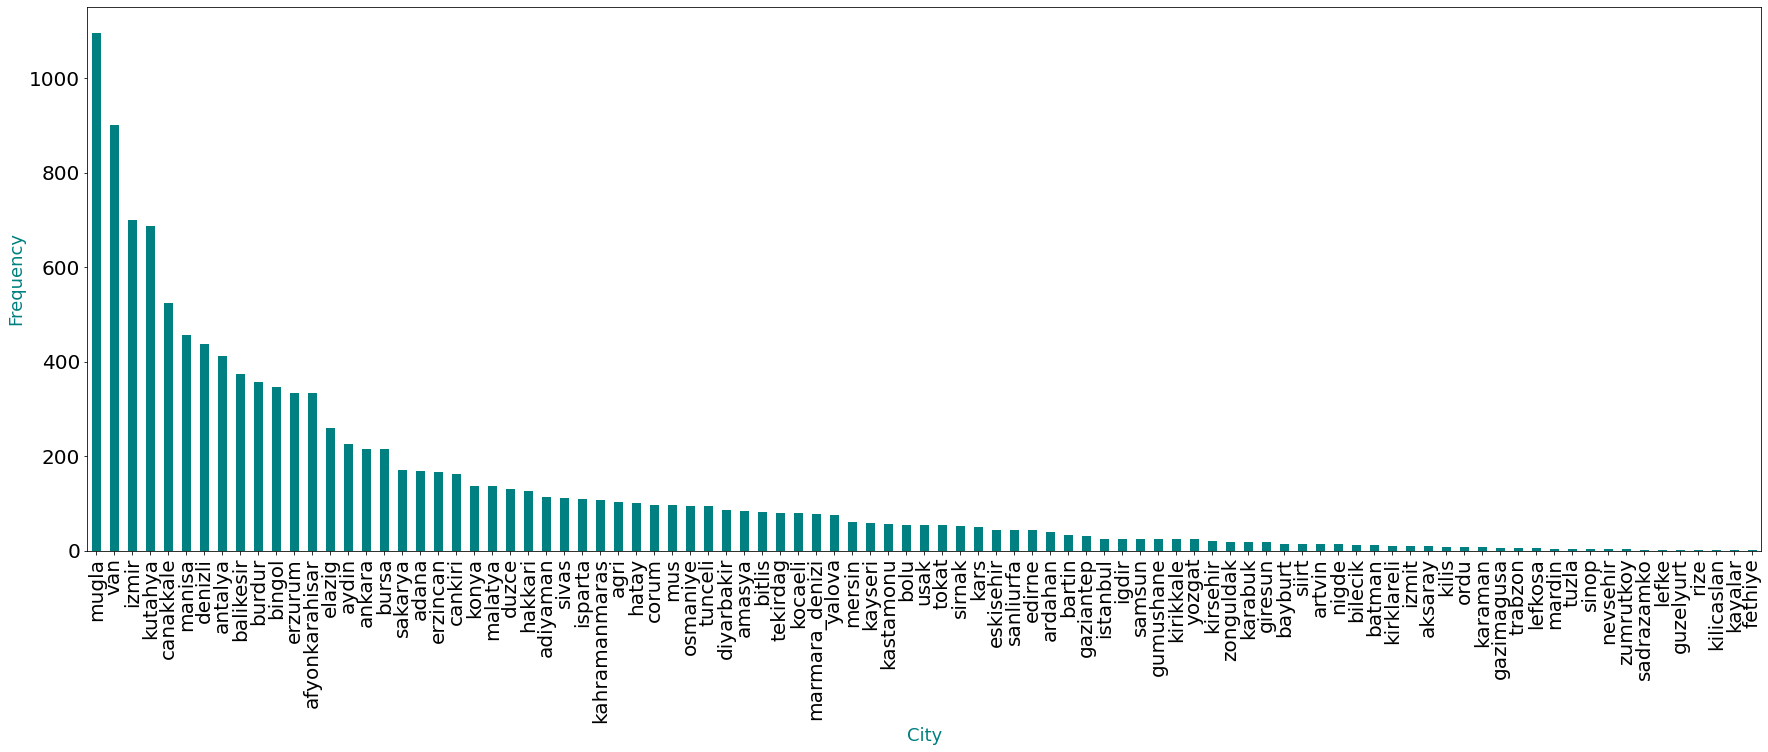

In [89]:
data.city.value_counts().plot(kind = "bar" , color = "Teal" , figsize = (30,10),fontsize = 20)
plt.xlabel("City",fontsize=18,color="Teal")
plt.ylabel("Frequency",fontsize=18,color="Teal")
plt.show()

Text(0.5, 1.0, 'City')

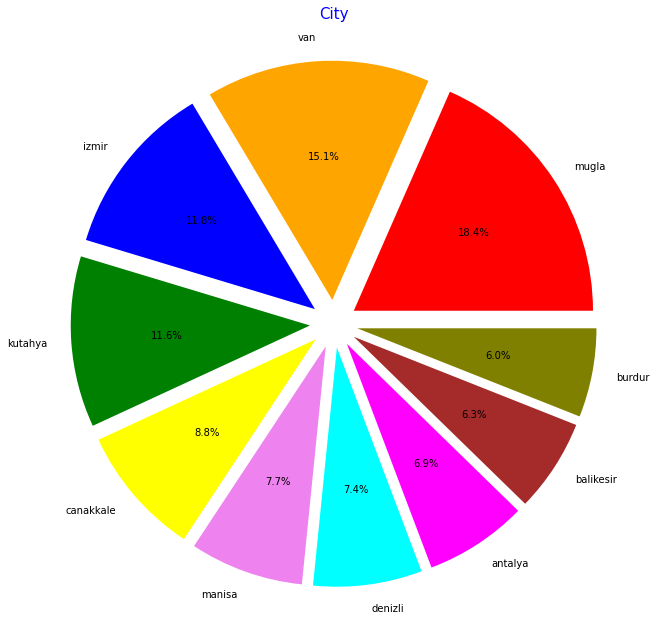

In [92]:
a=data.city.value_counts()[0:10]
sizes=a.values
labels=a.index
explode=[0,0,0,0,0,0]
colors = ["red","orange","blue","green","yellow","violet","cyan","magenta","brown","olive","lime","gray"]
plt.figure(figsize=(11,11))
plt.pie(sizes,explode=[0.1]*10,labels=labels,colors=colors,autopct='%1.1f%%')
plt.title('City',color = 'blue',fontsize = 15)

Text(0.5, 1.0, 'Area')

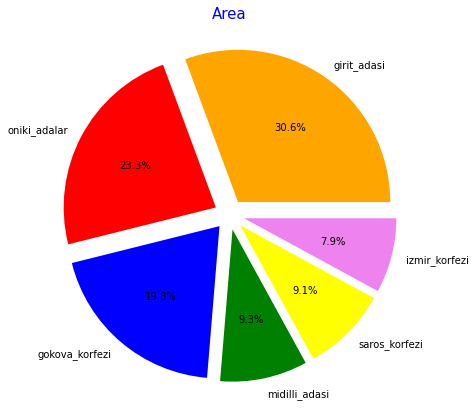

In [96]:
a=data.area.value_counts()[0:6]
sizes=a.values
labels=a.index
explode=[0,0,0,0,0,0]
colors=["orange","red","blue","green","yellow","violet"]
plt.figure(figsize=(7,7))
plt.pie(sizes,explode=[0.1]*6,labels=labels,colors=colors,autopct='%1.1f%%')
plt.title('Area',color = 'blue',fontsize = 15)

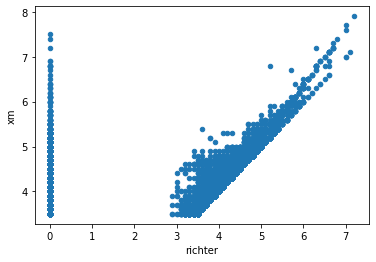

In [99]:


data.plot(kind = "scatter",x="richter",y = "xm")
plt.show()



Text(0.5, 1.0, 'Longitude - Latitude')

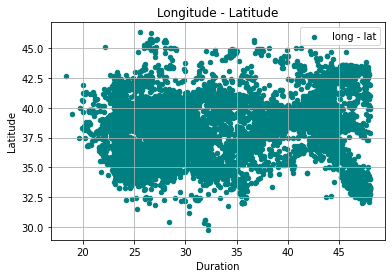

In [103]:
#plt.scatter(d.long, d.lat, grid=True, label= "latitude - duration", color="red")
data.plot(kind= "scatter", x= "long", y= "lat", grid=True, label= "long - lat", color="Teal")
plt.legend()
plt.xlabel("Duration")
plt.ylabel("Latitude")
plt.title("Longitude - Latitude")

No handles with labels found to put in legend.


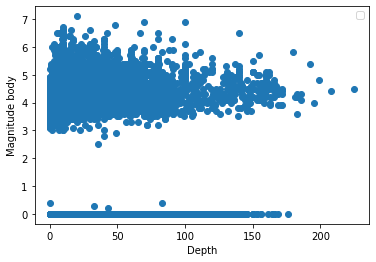

In [104]:
plt.scatter(data.depth, data.mb)
plt.legend()
plt.xlabel("Depth")
plt.ylabel("Magnitude body")
plt.show()

No handles with labels found to put in legend.


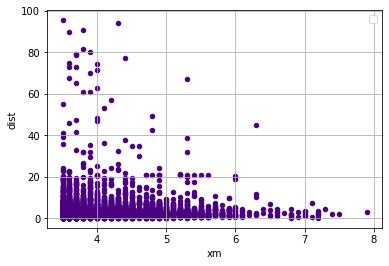

In [107]:
data.plot(kind= "scatter", x= "xm", y= "dist",color= "Indigo", grid= True)
plt.xlabel= "Latitude"
plt.ylabel= "md"
plt.legend()

No handles with labels found to put in legend.


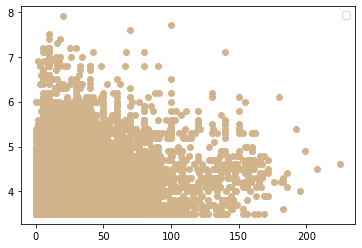

In [111]:
plt.scatter(data.depth, data.xm, color= "Tan")
plt.legend()
plt.xlabel = "Depth"
plt.ylabel = "xm"
plt.show()

No handles with labels found to put in legend.


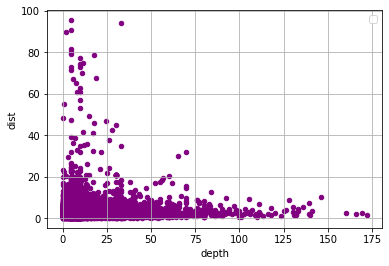

In [112]:
data.plot(kind= "scatter", x= "depth", y= "dist",color= "purple", grid= True)
plt.xlabel= "Latitude"
plt.ylabel= "md"
plt.legend()

In [113]:
istanbul = data[data.city== "istanbul"]
print(istanbul)

                 id             newtime    lat   long country      city  \
215    1.970000e+13 1967-08-06 12:09:33  41.00  28.80  turkey  istanbul   
3776   1.980000e+13 1975-09-23 12:53:47  41.12  28.10  turkey  istanbul   
4847   1.930000e+13 1925-06-10 12:45:00  41.00  29.00  turkey  istanbul   
5750   1.980000e+13 1977-03-03 12:40:53  40.88  29.16  turkey  istanbul   
5996   2.000000e+13 2000-07-01 12:51:02  41.21  28.17  turkey  istanbul   
6600   2.000000e+13 2000-07-07 12:15:31  40.85  29.23  turkey  istanbul   
7074   1.960000e+13 1964-04-18 12:52:54  41.10  29.00  turkey  istanbul   
7315   1.980000e+13 1978-01-27 12:16:28  40.96  29.40  turkey  istanbul   
7793   2.010000e+13 2012-10-19 12:17:25  41.04  28.63  turkey  istanbul   
8326   1.920000e+13 1923-10-26 12:13:16  41.20  28.60  turkey  istanbul   
9156   2.000000e+13 2001-01-16 12:33:02  40.90  29.07  turkey  istanbul   
9158   2.010000e+13 2014-02-05 12:56:44  41.37  28.62  turkey  istanbul   
9202   1.970000e+13 1967-

In [126]:
print(len(izmir), "times in izmir except the districts")
#print("İzmir'de ilçeler hariç tam", len(izmir) ," kez"  )

700 times in izmir except the districts
İzmir'de ilçeler hariç tam 700  kez


In [116]:
ankara = data[data.city== "ankara"]
print(ankara)

                 id             newtime    lat   long country    city  \
123    2.010000e+13 2009-03-09 12:42:30  39.05  32.34  turkey  ankara   
325    1.990000e+13 1992-03-02 12:50:02  40.33  32.98  turkey  ankara   
462    2.010000e+13 2008-01-07 12:26:35  39.45  33.06  turkey  ankara   
732    2.020000e+13 2016-11-26 12:52:09  40.26  33.34  turkey  ankara   
776    2.000000e+13 2003-08-31 12:07:17  40.47  32.86  turkey  ankara   
...             ...                 ...    ...    ...     ...     ...   
9869   1.990000e+13 1994-01-19 12:35:40  40.00  33.05  turkey  ankara   
9885   2.010000e+13 2010-02-19 12:35:00  40.00  33.10  turkey  ankara   
23971  2.020000e+13 2016-07-30 12:34:59  40.31  33.33  turkey  ankara   
23972  2.020000e+13 2016-07-30 12:11:47  40.32  33.32  turkey  ankara   
23973  2.020000e+13 2016-08-02 12:30:51  40.33  33.31  turkey  ankara   

                             area   direction  dist  depth   xm   md  richter  \
123               emirler_haymana  south_e

In [117]:
print(len(ankara), "times in izmir except the districts")

216 times in izmir except the districts


In [118]:
izmir = data[data.city== "izmir"]
print(izmir)

                 id             newtime    lat   long country   city  \
43     1.970000e+13 1974-04-03 12:37:29  38.34  27.40  turkey  izmir   
59     1.990000e+13 1994-07-30 12:28:50  39.12  27.18  turkey  izmir   
61     2.010000e+13 2014-10-21 12:03:56  38.18  27.11  turkey  izmir   
81     1.990000e+13 1989-09-28 12:13:15  38.22  27.45  turkey  izmir   
105    2.000000e+13 1996-02-20 12:53:06  38.25  27.13  turkey  izmir   
...             ...                 ...    ...    ...     ...    ...   
23659  2.020000e+13 2017-06-12 12:32:52  38.72  26.22  turkey  izmir   
23716  2.020000e+13 2017-07-08 12:12:45  38.42  26.71  turkey  izmir   
23888  2.020000e+13 2015-01-10 12:32:08  38.21  27.05  turkey  izmir   
23935  2.020000e+13 2016-03-28 12:40:58  38.69  26.40  turkey  izmir   
23966  2.020000e+13 2016-07-17 12:01:48  38.53  26.41  turkey  izmir   

                        area   direction  dist  depth   xm   md  richter   mw  \
43         visneli_kemalpasa  south_east   0.2    5.0 

In [119]:
print(len(izmir), "times in izmir except the districts")

700 times in izmir except the districts


In [120]:
sinop = data[data.city== "sinop"]
print(sinop)

                 id             newtime    lat   long country   city  \
1725   1.940000e+13 1935-03-05 12:10:00  41.50  34.50  turkey  sinop   
9709   2.000000e+13 2000-04-03 12:24:27  42.02  35.26  turkey  sinop   
11405  1.970000e+13 1966-05-07 12:09:08  42.21  35.60  turkey  sinop   
23282  2.020000e+13 2016-07-22 12:40:10  42.31  35.23  turkey  sinop   

                  area   direction  dist  depth   xm   md  richter   mw   ms  \
1725   sariyar_boyabat  north_east   1.1   30.0  4.8  4.7      4.6  4.8  4.6   
9709               NaN        east   9.0    9.0  3.9  3.9      0.0  NaN  0.0   
11405   sinop_aciklari         NaN   NaN   12.0  4.5  4.3      4.3  4.5  4.2   
23282   sinop_aciklari         NaN   NaN    7.4  4.3  0.0      4.3  4.0  0.0   

        mb  year  month  
1725   4.7  1935  23223  
9709   0.0  2000  24004  
11405  4.4  1966  23597  
23282  0.0  2016  24199  
